In [1]:
import torch
import numpy as np
import time
from matplotlib import pyplot as plt
from hd_python import hamming_distance, torch_hd, HAMMING_DISTANCE_TORCH


# Functions

In [2]:

def cosine(a, b):
    return torch.cosine_similarity(a, b)

def euclidean(a, b):
    return torch.cdist(a, b)

def clip(a, b):
    logits_per_text = torch.matmul(a, b.t())
    probs = logits_per_text.softmax(dim=1)
    return probs.argmax(1)

def band(a, b):
    return a & b

def bmul(a, b):
    return a * b

def bxor(a, b):
    return torch.bitwise_xor(a, b)

def numpy_nonzero(a, b):
    return np.count_nonzero(a != b)



# same samples varies in size

In [10]:
a_times = {}
for i in range(10):
    asize = 512+i*512
    a_times[asize] = []
    bf = torch.rand((5000, asize), dtype=torch.float)
    for j in range(2010):
        af = torch.rand((1, asize), dtype=torch.float)
        t = time.time()
        clip(af, bf)
        a_times[asize].append(time.time() - t)

In [58]:
a_times.keys()

dict_keys([512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352])

In [50]:
np.mean(a_times[asize])

0.0010184258370850216

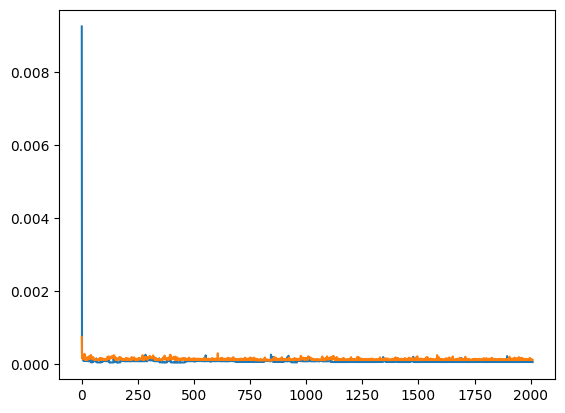

In [28]:
for asize in a_times:
    plt.plot(a_times[asize])

In [11]:
b_times = {}
for i in range(10):
    bsize = 512+i*512
    b_times[bsize] = []
    bb = torch.rand((5000, bsize)) > 0.5
    for j in range(2010):
        ab = torch.rand((1, bsize)) > 0.5
        t = time.time()
        bxor(ab, bb)
        b_times[bsize].append(time.time() - t)

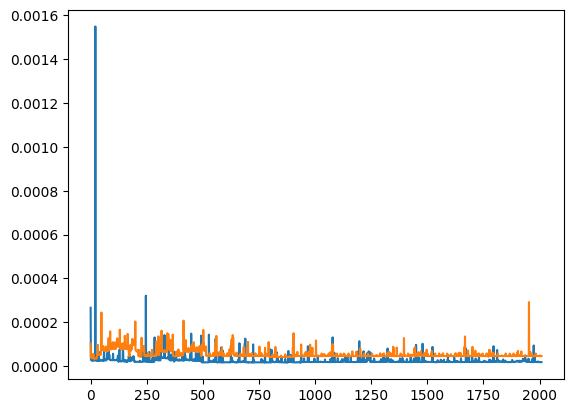

In [30]:
for bsize in b_times:
    plt.plot(b_times[bsize])

In [9]:

def uint8(b, bits=8):
    mask = 2 ** torch.arange(bits - 1, -1, -1).to(b.device, b.dtype)
    return torch.sum(mask * b, -1)

c_times = {}
for i in range(10):
    csize = 512+i*512
    c_times[csize] = []
    bc = torch.rand((5000, csize)) > 0.5
    bc = uint8(bc.reshape(5000, csize//8, 8))
    for j in range(2010):
        ac = uint8(torch.rand((1, csize//8, 8)) > 0.5)
        t = time.time()
        HAMMING_DISTANCE_TORCH[ac, bc]
        c_times[csize].append(time.time() - t)


In [23]:
c_times.keys()

dict_keys([512, 1024])

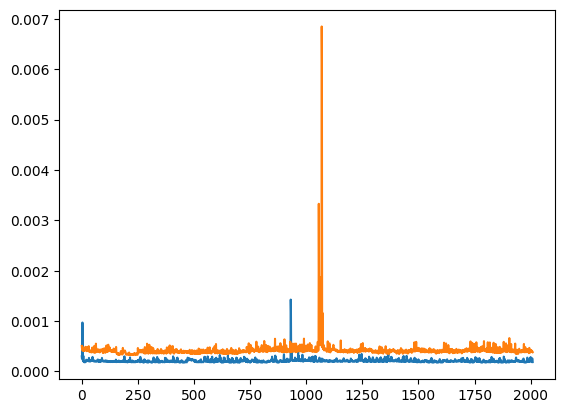

In [7]:
for csize in c_times:
    plt.plot(c_times[csize])

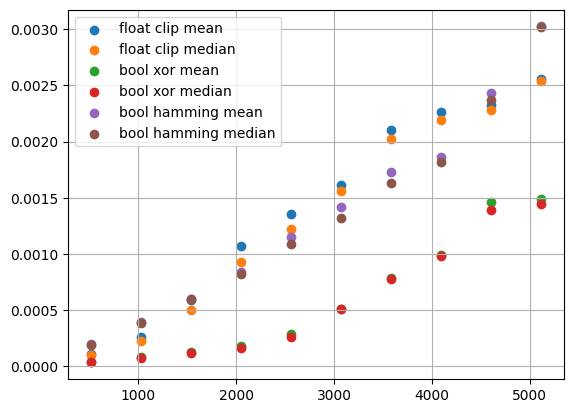

In [13]:
ax = []
aymean = []
aymedian = []
for asize in a_times:
    ax.append(asize)
    aymedian.append(np.median(a_times[asize]))
    aymean.append(np.mean(a_times[asize]))
bx = []
bymedian = []
bymean = []
for bsize in b_times:
    bx.append(bsize)
    bymedian.append(np.median(b_times[bsize]))
    bymean.append(np.mean(b_times[bsize]))
cx = []
cymedian = []
cymean = []
for csize in c_times:
    cx.append(csize)
    cymedian.append(np.median(c_times[csize]))
    cymean.append(np.mean(c_times[csize]))
plt.scatter(ax, aymean, label='float clip mean')
plt.scatter(ax, aymedian, label='float clip median')
plt.scatter(bx, bymean, label='bool xor mean')
plt.scatter(bx, bymedian, label='bool xor median')
plt.scatter(cx, cymean, label='bool hamming mean')
plt.scatter(cx, cymedian, label='bool hamming median')
plt.grid()
plt.legend(loc="upper left")

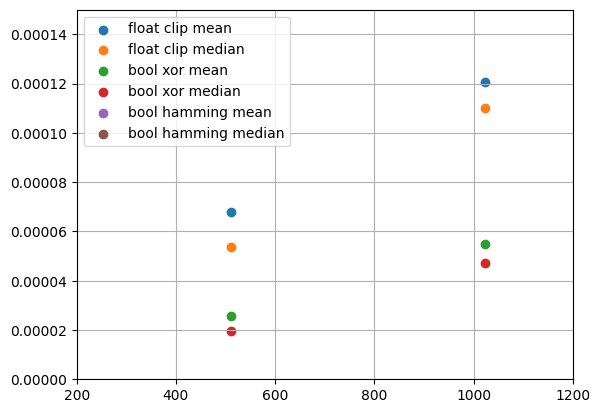

In [44]:
plt.scatter(ax, aymean, label='float clip mean')
plt.scatter(ax, aymedian, label='float clip median')
plt.scatter(bx, bymean, label='bool xor mean')
plt.scatter(bx, bymedian, label='bool xor median')
plt.scatter(cx, cymean, label='bool hamming mean')
plt.scatter(cx, cymedian, label='bool hamming median')
plt.grid()
plt.xlim(200, 1200)
plt.ylim(0, 0.00015)
plt.legend(loc="upper left")

# Varied sample

In [24]:
a_times = {}
for i in range(1000):
    asize = 2048+i*2048
    a_times[asize] = []
    bf = torch.rand((asize, 512), dtype=torch.float)
    for j in range(2010):
        af = torch.rand((1, 512), dtype=torch.float)
        t = time.time()
        clip(af, bf)
        a_times[asize].append(time.time() - t)

KeyboardInterrupt: 

In [28]:
len(a_times)

162

In [29]:
b_times = {}
for i in range(162):
    bsize = 2048+i*2048
    b_times[bsize] = []
    bb = torch.rand((bsize, 1024)) > 0.5
    for j in range(2010):
        ab = torch.rand((1, 1024)) > 0.5
        t = time.time()
        bxor(ab, bb)
        b_times[bsize].append(time.time() - t)

KeyboardInterrupt: 

In [32]:
b_times.keys()

dict_keys([2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960, 43008, 45056, 47104, 49152, 51200, 53248, 55296, 57344, 59392, 61440, 63488, 65536, 67584, 69632, 71680, 73728, 75776, 77824, 79872, 81920, 83968, 86016, 88064, 90112, 92160, 94208, 96256, 98304, 100352, 102400, 104448, 106496, 108544, 110592, 112640, 114688, 116736, 118784, 120832, 122880, 124928])

In [33]:

def uint8(b, bits=8):
    mask = 2 ** torch.arange(bits - 1, -1, -1).to(b.device, b.dtype)
    return torch.sum(mask * b, -1)

c_times = {}
for i in range(162):
    csize = 2048+i*2048
    c_times[csize] = []
    bc = torch.rand((csize, 1024)) > 0.5
    bc = uint8(bc.reshape(csize, 128, 8))
    for j in range(2010):
        ac = uint8(torch.rand((1, 128, 8)) > 0.5)
        t = time.time()
        HAMMING_DISTANCE_TORCH[ac, bc]
        c_times[csize].append(time.time() - t)


KeyboardInterrupt: 

In [34]:
c_times.keys()

dict_keys([2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384, 18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 34816, 36864, 38912, 40960, 43008, 45056, 47104, 49152, 51200])

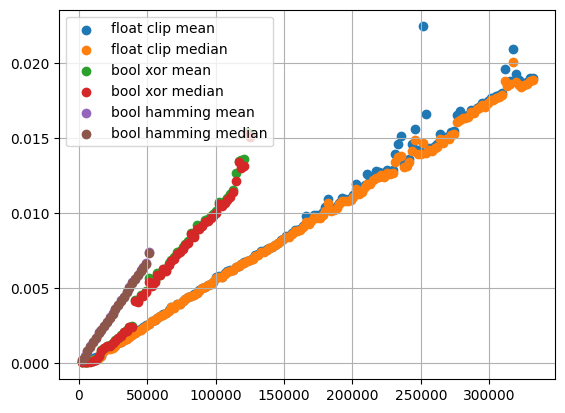

In [35]:
ax = []
aymean = []
aymedian = []
for asize in a_times:
    ax.append(asize)
    aymedian.append(np.median(a_times[asize]))
    aymean.append(np.mean(a_times[asize]))
bx = []
bymedian = []
bymean = []
for bsize in b_times:
    bx.append(bsize)
    bymedian.append(np.median(b_times[bsize]))
    bymean.append(np.mean(b_times[bsize]))
cx = []
cymedian = []
cymean = []
for csize in c_times:
    cx.append(csize)
    cymedian.append(np.median(c_times[csize]))
    cymean.append(np.mean(c_times[csize]))
plt.scatter(ax, aymean, label='float clip mean')
plt.scatter(ax, aymedian, label='float clip median')
plt.scatter(bx, bymean, label='bool xor mean')
plt.scatter(bx, bymedian, label='bool xor median')
plt.scatter(cx, cymean, label='bool hamming mean')
plt.scatter(cx, cymedian, label='bool hamming median')
plt.grid()
plt.legend(loc="upper left")

In [12]:
b_times.keys()

dict_keys([5000, 10000, 15000, 20000, 25000, 30000, 35000])